In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.cm as cm

# Load the dataset
file_path = "cleaned_weather_data.csv"
df = pd.read_csv(file_path)

# Display first few rows to understand the data
df.head()

,City,Date & Time,Temperature,Temp Min,Temp Max,Humidity,Pressure,Wind Speed,Visibility,Cloud Coverage,Weather Description,Rain Volume (last 3h),Snow Volume (last 3h),Rain Volume (last 3h) cleaned,Snow Volume (last 3h) cleaned,Month-Day,Time,Day
0,Boulder,1/27/2025 0:00,-7.30,-8.52,-7.30,79,1027,2.50,10000.0,90,Overcast clouds,No rain,No snow,No rain,No snow,27-Jan,0:00,1/27/2025
1,Boulder,1/27/2025 3:00,-8.35,-9.18,-8.35,79,1029,3.91,10000.0,43,Scattered clouds,No rain,No snow,No rain,No snow,27-Jan,3:00,1/27/2025
2,Boulder,1/27/2025 6:00,-8.06,-8.06,-8.06,78,1029,4.66,10000.0,11,Few clouds,No rain,No snow,No rain,No snow,27-Jan,6:00,1/27/2025
3,Boulder,1/27/2025 9:00,-7.21,-7.21,-7.21,74,1028,5.12,10000.0,4,Clear sky,No rain,No snow,No rain,No snow,27-Jan,9:00,1/27/2025
4,Boulder,1/27/2025 12:00,-6.62,-6.62,-6.62,70,1026,6.09,10000.0,4,Clear sky,No rain,No snow,No rain,No snow,27-Jan,12:00,1/27/2025


In [23]:
df.dtypes

City                              object
Date & Time                       object
Temperature                      float64
Temp Min                         float64
Temp Max                         float64
Humidity                           int64
Pressure                           int64
Wind Speed                       float64
Visibility                       float64
Cloud Coverage                     int64
Weather Description               object
Rain Volume (last 3h)             object
Snow Volume (last 3h)             object
Rain Volume (last 3h) cleaned     object
Snow Volume (last 3h) cleaned     object
Month-Day                         object
Time                              object
Day                               object
dtype: object

In [24]:
# Drop non-numeric columns and "Cloud coverage" column since it is a label
df_numeric = df.select_dtypes(include=[np.number]).drop(columns=["Cloud coverage"], errors='ignore')

# Standardize the data
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df_numeric)

In [25]:
# Apply PCA with 2 components
pca_2 = PCA(n_components=2)
pca_2_result = pca_2.fit_transform(df_scaled)

In [26]:
# Apply PCA with 3 components
pca_3 = PCA(n_components=3)
pca_3_result = pca_3.fit_transform(df_scaled)

In [27]:
# Explained variance for 2D and 3D
explained_variance_2D = np.sum(pca_2.explained_variance_ratio_) * 100
explained_variance_3D = np.sum(pca_3.explained_variance_ratio_) * 100

print(f"Variance retained in 2D PCA: {explained_variance_2D:.2f}%")
print(f"Variance retained in 3D PCA: {explained_variance_3D:.2f}%")

Variance retained in 2D PCA: 74.17%
Variance retained in 3D PCA: 86.72%


In [28]:
# Determine the number of components to retain 95% variance
pca_full = PCA()
pca_full.fit(df_scaled)
cumulative_variance = np.cumsum(pca_full.explained_variance_ratio_)

num_components_95 = np.argmax(cumulative_variance >= 0.95) + 1
print(f"Number of components needed to retain 95% variance: {num_components_95}")

Number of components needed to retain 95% variance: 5


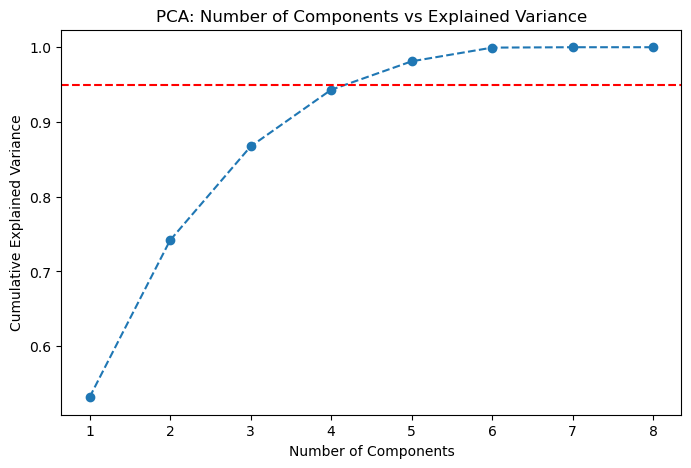

In [29]:
# Plot cumulative variance
plt.figure(figsize=(8,5))
plt.plot(range(1, len(cumulative_variance) + 1), cumulative_variance, marker='o', linestyle='--')
plt.axhline(y=0.95, color='r', linestyle='--')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA: Number of Components vs Explained Variance')
plt.show()

In [30]:
# Extract top 3 eigenvalues
eigenvalues = pca_full.explained_variance_
top_3_eigenvalues = eigenvalues[:3]
print("Top 3 eigenvalues:", top_3_eigenvalues)

Top 3 eigenvalues: [4.26042625 1.6830713  1.0057559 ]


C:\Users\uttar\AppData\Local\Temp\ipykernel_31504\3076665313.py:2: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = cm.get_cmap("viridis")


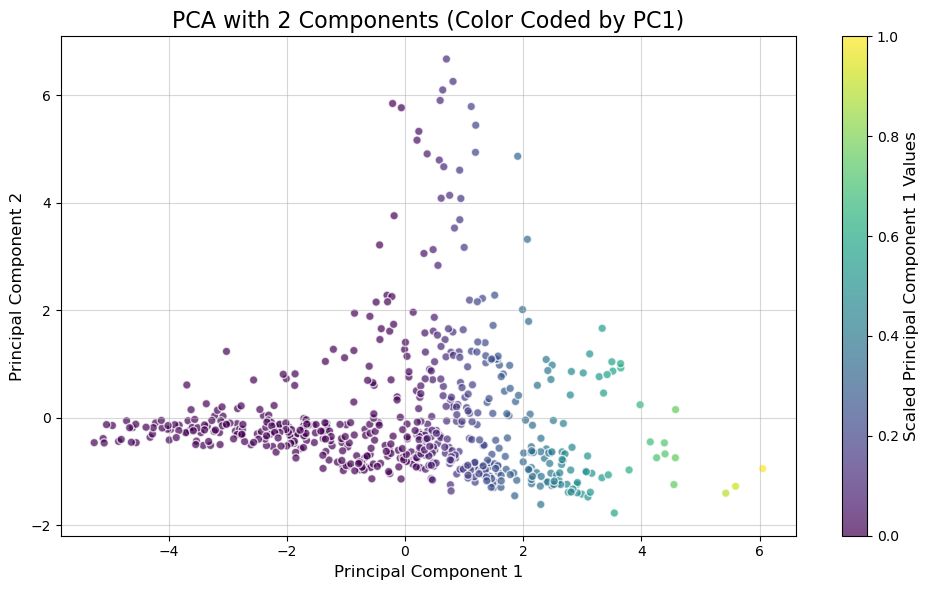

In [31]:
plt.figure(figsize=(10, 6))
cmap = cm.get_cmap("viridis")
colors_2d = cmap(pca_2_result[:, 0] / max(pca_2_result[:, 0]))

plt.scatter(
    pca_2_result[:, 0], 
    pca_2_result[:, 1], 
    c=colors_2d, 
    alpha=0.7, 
    edgecolor='w'
)

cbar = plt.colorbar()
cbar.set_label('Scaled Principal Component 1 Values', fontsize=12)

plt.title('PCA with 2 Components (Color Coded by PC1)', fontsize=16)
plt.xlabel('Principal Component 1', fontsize=12)
plt.ylabel('Principal Component 2', fontsize=12)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

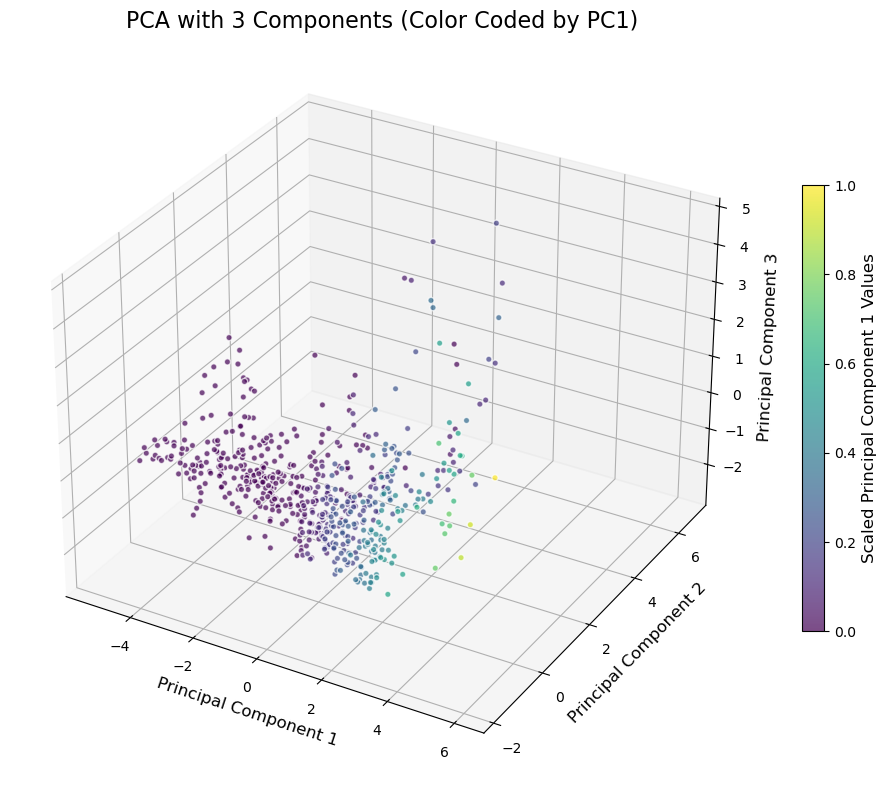

In [32]:
colors = cmap(pca_3_result[:, 0] / max(pca_3_result[:, 0]))

fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')

sc = ax.scatter(
    pca_3_result[:, 0], 
    pca_3_result[:, 1], 
    pca_3_result[:, 2], 
    c=colors, 
    alpha=0.7, 
    edgecolor='w'
)

cbar = plt.colorbar(sc, ax=ax, shrink=0.6)
cbar.set_label('Scaled Principal Component 1 Values', fontsize=12)

ax.set_title('PCA with 3 Components (Color Coded by PC1)', fontsize=16)
ax.set_xlabel('Principal Component 1', fontsize=12)
ax.set_ylabel('Principal Component 2', fontsize=12)
ax.set_zlabel('Principal Component 3', fontsize=12)
plt.tight_layout()
plt.show()

In [33]:
# Convert PCA results to DataFrame for 2D PCA
df_pca_2 = pd.DataFrame(pca_2_result, columns=["PC1", "PC2"])
print("PCA with 2 Components:")
df_pca_2.head()  # Print first few rows

PCA with 2 Components:


,PC1,PC2
0,-3.020464,1.233479
1,-3.691018,0.609824
2,-3.619180,0.150482
3,-3.220452,0.034118
4,-2.832065,0.170403


In [34]:
# Convert PCA results to DataFrame for 3D PCA
df_pca_3 = pd.DataFrame(pca_3_result, columns=["PC1", "PC2", "PC3"])
print("\nPCA with 3 Components:")
df_pca_3.head() # Print first few rows


PCA with 3 Components:


,PC1,PC2,PC3
0,-3.020464,1.233479,0.343731
1,-3.691018,0.609824,1.406106
2,-3.619180,0.150482,1.962406
3,-3.220452,0.034118,2.351862
4,-2.832065,0.170403,3.139621


In [35]:
df_pca_2.to_csv("PCA/pca_2D_results.csv", index=False)
df_pca_3.to_csv("PCA/pca_3D_results.csv", index=False)